<img src="Structure_FWI.png" width="500">

### 1. Import Data and Required Packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

Drop Empty Rows

In [2]:
df.drop([122,123,124],axis=0,inplace=True)
df.reset_index(inplace=True)
#df.drop(['index'],axis=1,inplace=True)

Set the 0 and 1 for Bajaia and Sidi-Bel Abbes for Region Column

In [3]:
df.loc[:122,'Region']= 0 #'Bejaia'
df.loc[122:,'Region'] = 1 #'Sidi-Bel Abbes'

Drop Unnecessary index Column

In [4]:
df.drop(['index'],axis=1,inplace=True)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Assigning the day,month,Temperature,RH,Ws,Region as Integer datatype.

In [7]:
list = ['day','month','Temperature','RH','Ws','Region']
for i in list:
    df[i] = df[i].astype(int)

Assingning the 'Rain','FFMC','DMC','DC','ISI','BUI','FWI' as Float datatype.

In [8]:
list1 = ['Rain','FFMC','DMC','DC','ISI','BUI','FWI']
for j in list1:
    df[j] = df[j].astype(float)

### Numerical Features

In [9]:
num_feat = [num for num in df.columns if df[num].dtypes !='O']
print('We have {} numerical features are {}'.format(len(num_feat),num_feat))

We have 13 numerical features are ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


### Categorical Features

In [10]:
cat_feat = [cat for cat in df.columns if df[cat].dtypes == 'O']
cat_feat

['year', 'Classes']

In [11]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.500000
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,0.500000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [12]:
df.dtypes

day              int32
month            int32
year            object
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object

In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(6), object(2)
memory usage: 23.0+ KB


## Univariate Analysis

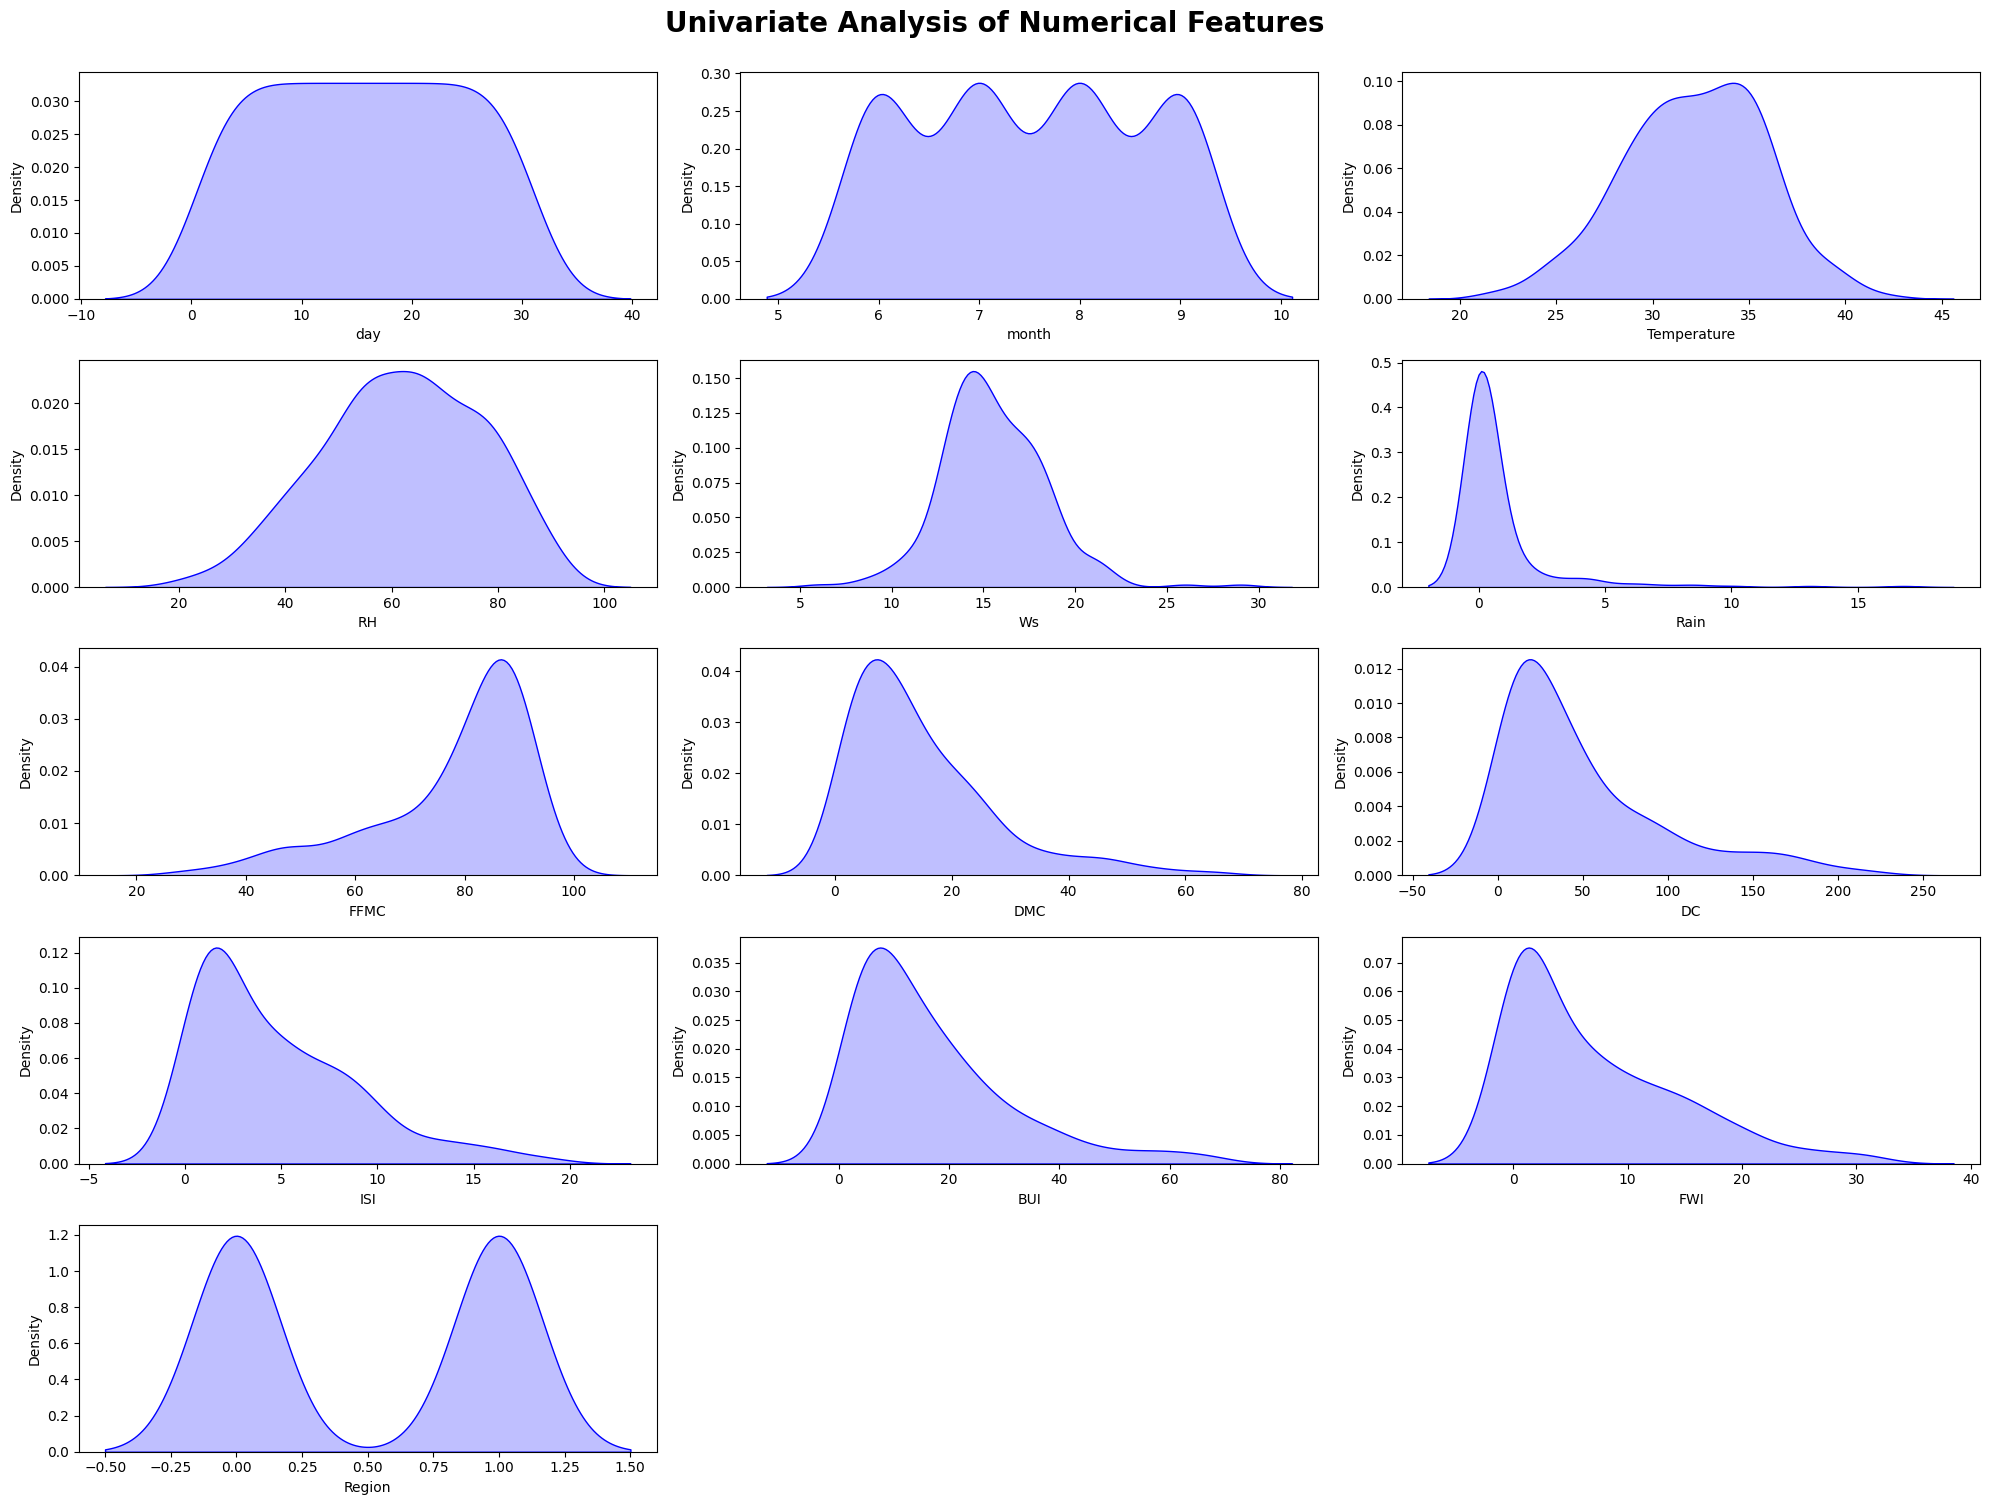

In [43]:
plt.figure(figsize = (20,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',y=1.)
for i in range(0,len(num_feat)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_feat[i]],shade='True',color='b')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

**Observation:**
1. Rain feature has outliers
2. Rain,DMC,DC,ISI,BUI and FWI are Right Skewed or Positivaly Skewed.
3. Region and Temperature are Normally Distributed.
4. FFMC is Negatively Skewed.

## Multivariate Analysis

In [16]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,1.910937e-01
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-8.148947e-02
ISI,1.793008e-01,6.354476e-02,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,2.662977e-01


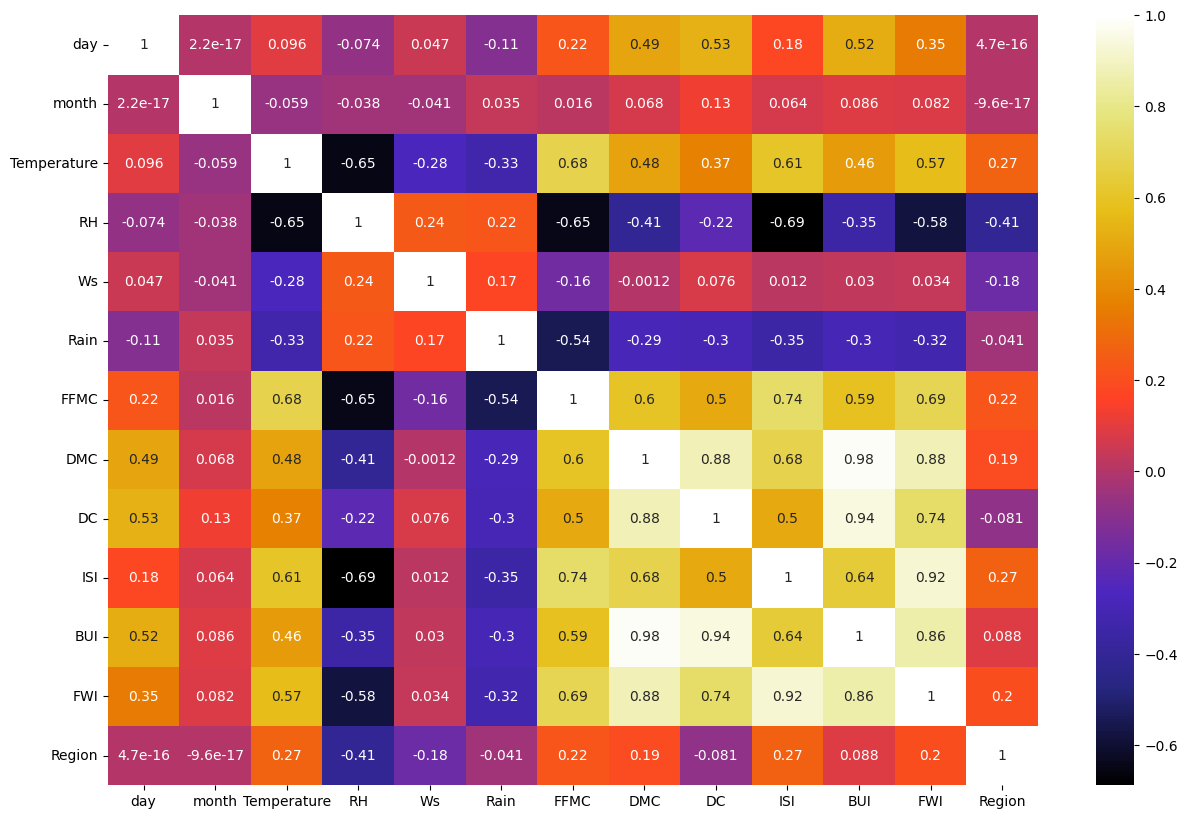

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
1. The Initial Spread Index is 0.74 with FFMC.
2. The BUI is 0.98 and 0.94 with DMC and DC.
3. The FWI is 0.86 and 0.92 with BUI and ISI.

In [18]:
df.groupby(['Ws','day','month'])['Rain'].max()

Ws  day  month
6   24   9         2.0
8   19   9         0.1
9   17   8         0.0
    25   7         1.2
10  16   8         0.1
                  ... 
21  31   8        16.8
22  3    6        13.1
    23   7         0.4
26  14   9         8.3
29  28   9         0.5
Name: Rain, Length: 234, dtype: float64

**Report** 
1. Rain was 16.8 mm at 21 km/h wind speed on 31 August.

In [19]:
df['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

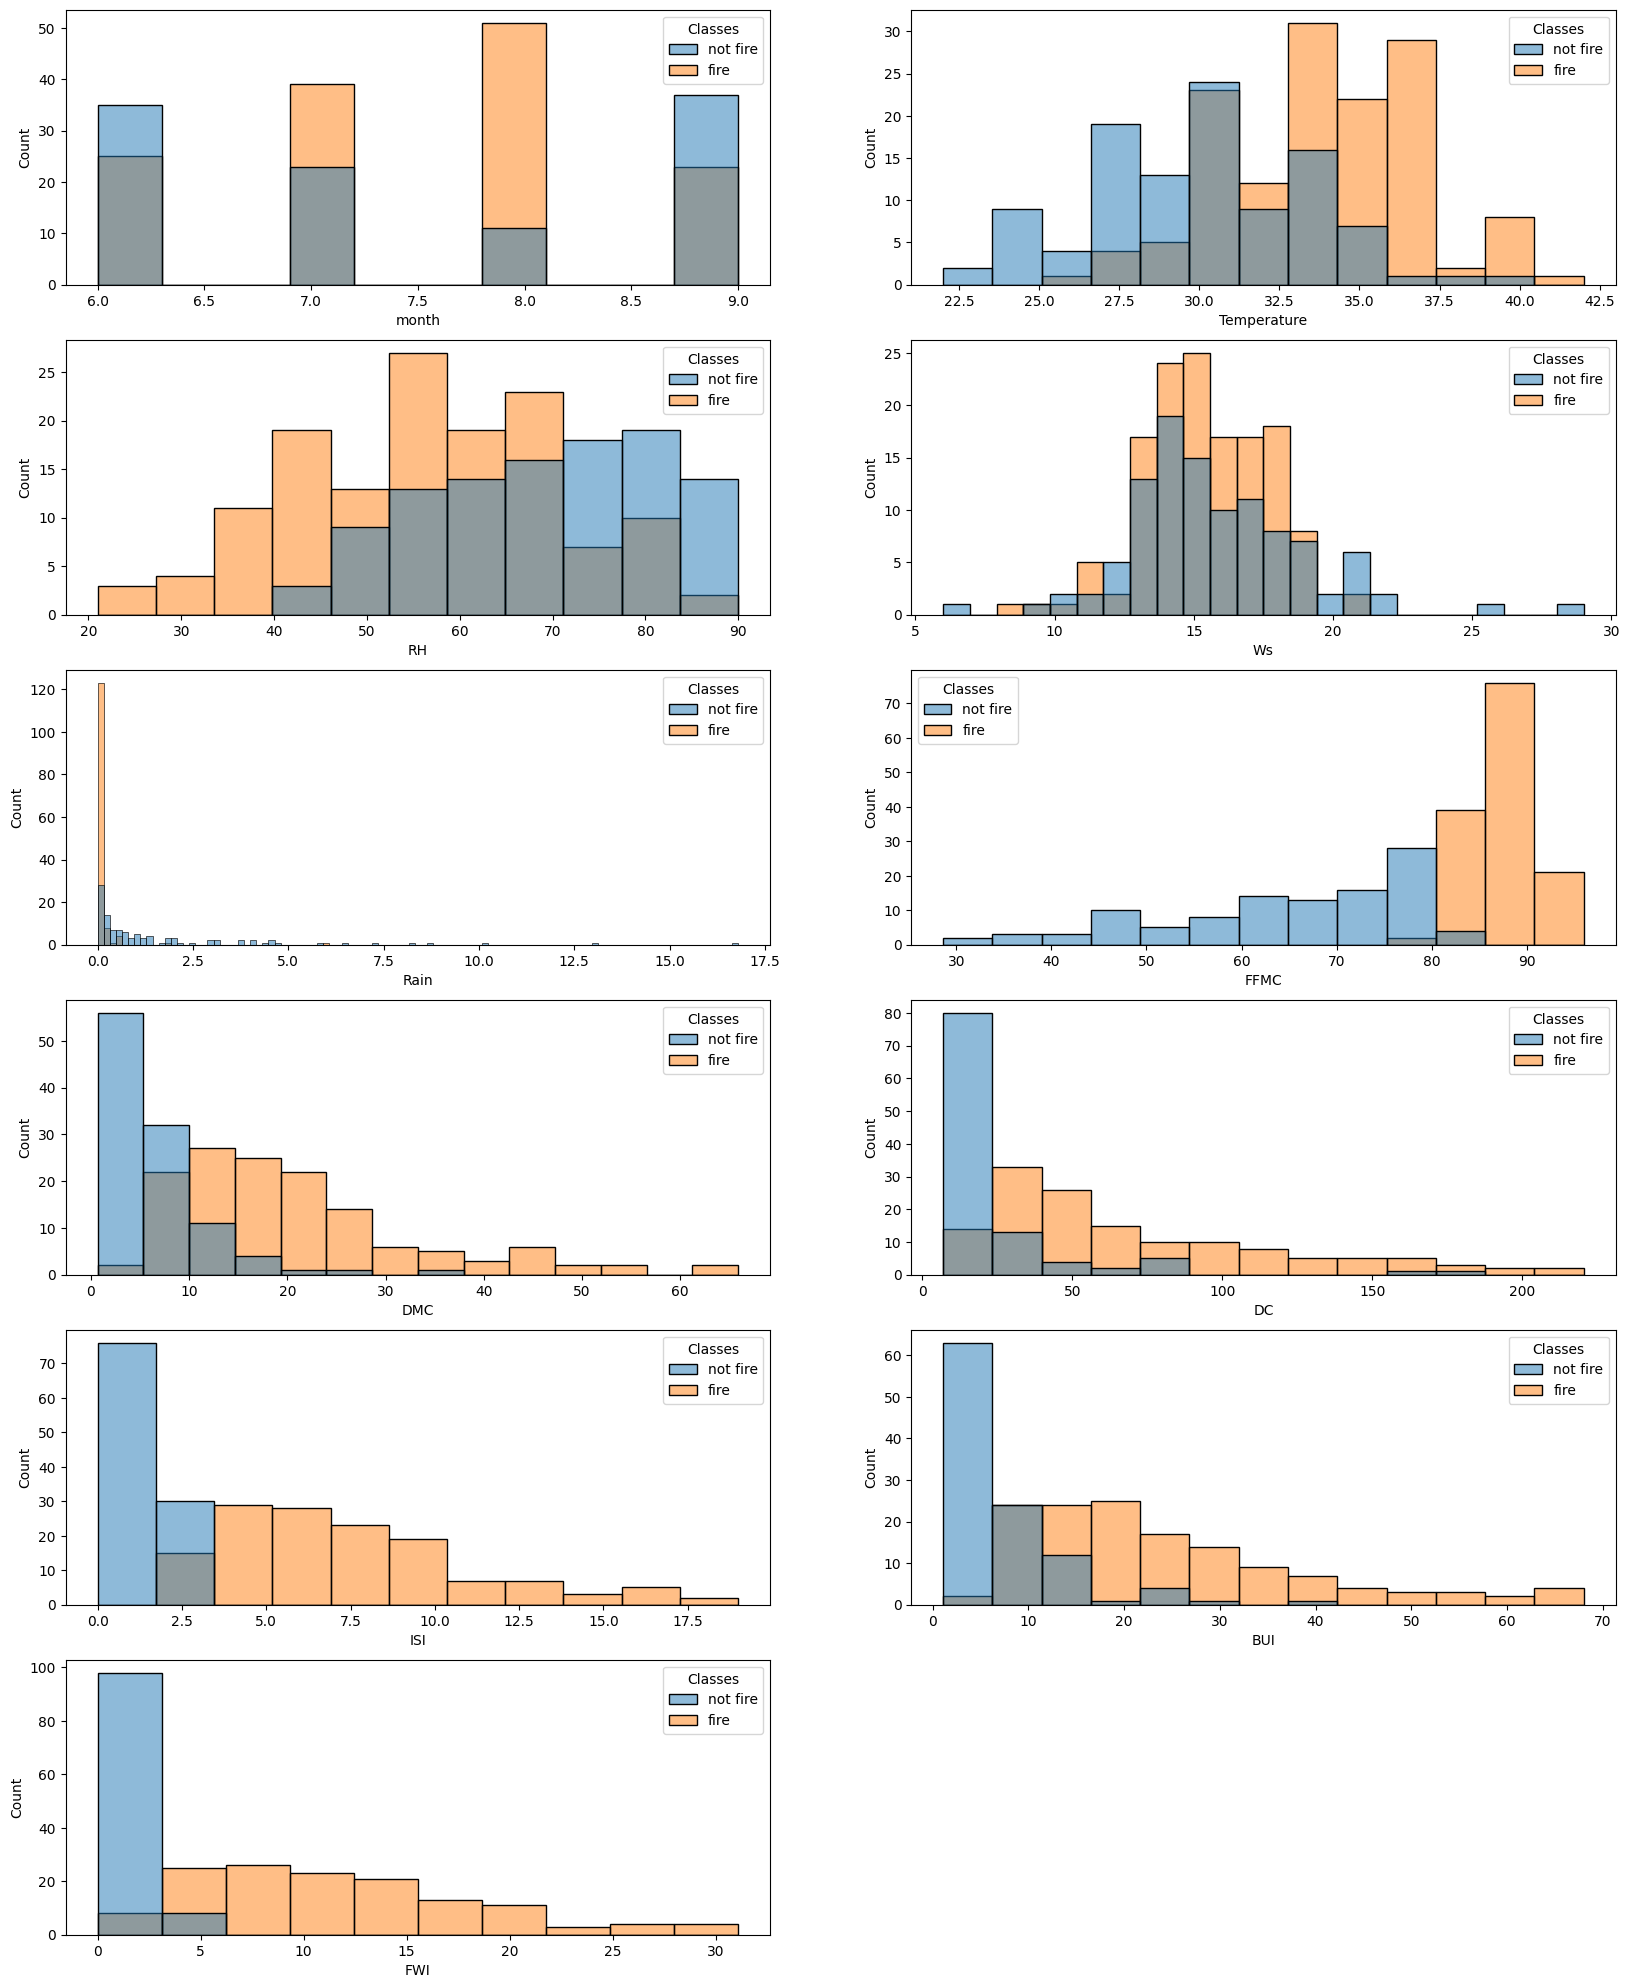

In [20]:
lst = ['month','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
plt.figure(figsize=(20,25))
for i in range(0,len(lst)):
    plt.subplot(6,2,i+1)
    sns.histplot(data=df,x=lst[i],hue='Classes')

In [21]:
df.groupby(['Temperature'])['FFMC'].max()

Temperature
22    47.4
24    79.7
25    52.9
26    84.0
27    88.9
28    84.6
29    89.3
30    89.4
31    90.6
32    91.5
33    93.9
34    92.5
35    92.2
36    93.9
37    94.3
38    93.8
39    93.7
40    94.2
42    96.0
Name: FFMC, dtype: float64

**Observation** 
* Temperature increases FFMC also increases.
* FFMC 96 at 42 Temperature.

In [80]:
df.groupby(['FWI'])['Temperature'].max()

FWI
0.0     30
0.1     29
0.2     32
0.3     33
0.4     34
        ..
26.9    35
30.0    36
30.2    35
30.3    33
31.1    34
Name: Temperature, Length: 126, dtype: int32

**Observation** 
* FWI index high(31.1) at Temperature 34 celsius. 

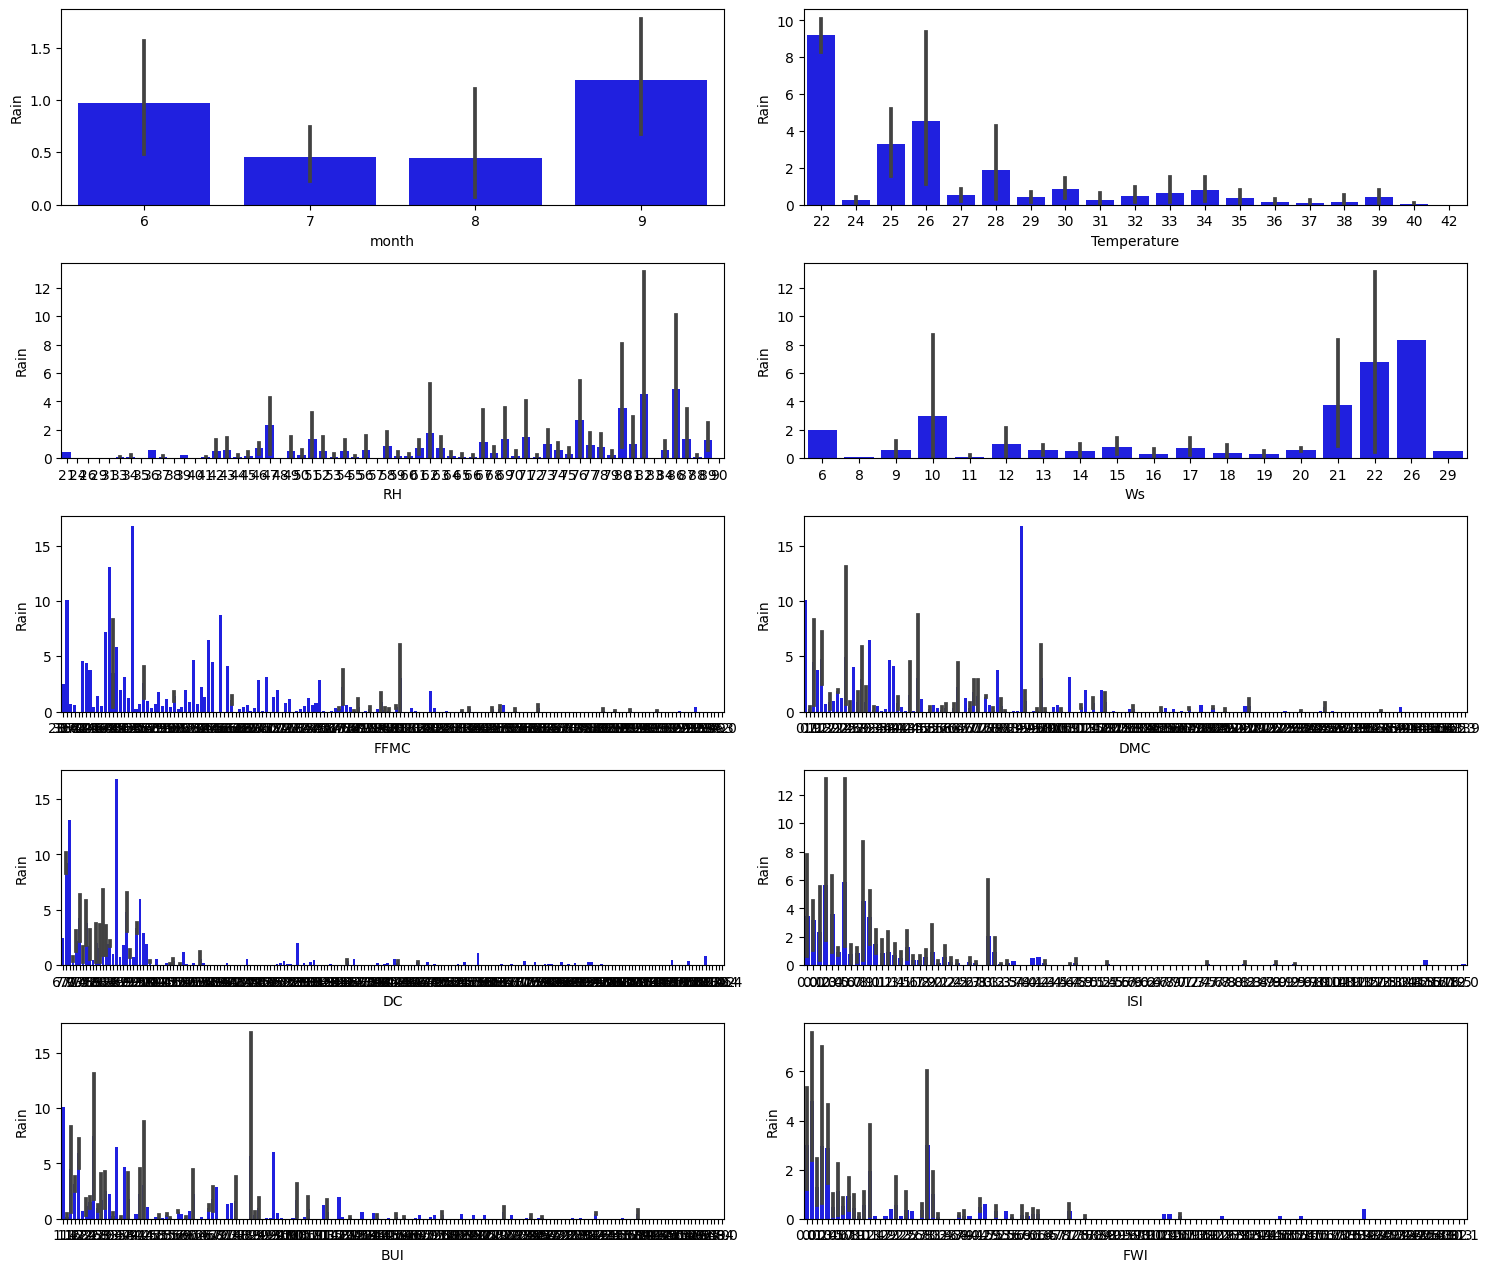

In [81]:
lst1 = ['month','Temperature','RH','Ws','FFMC','DMC','DC','ISI','BUI','FWI']
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(lst1)):
    ax = plt.subplot(8, 2, i+1)
    sns.barplot(data= df ,y='Rain', x=lst1[i], color='b')
    plt.tight_layout()

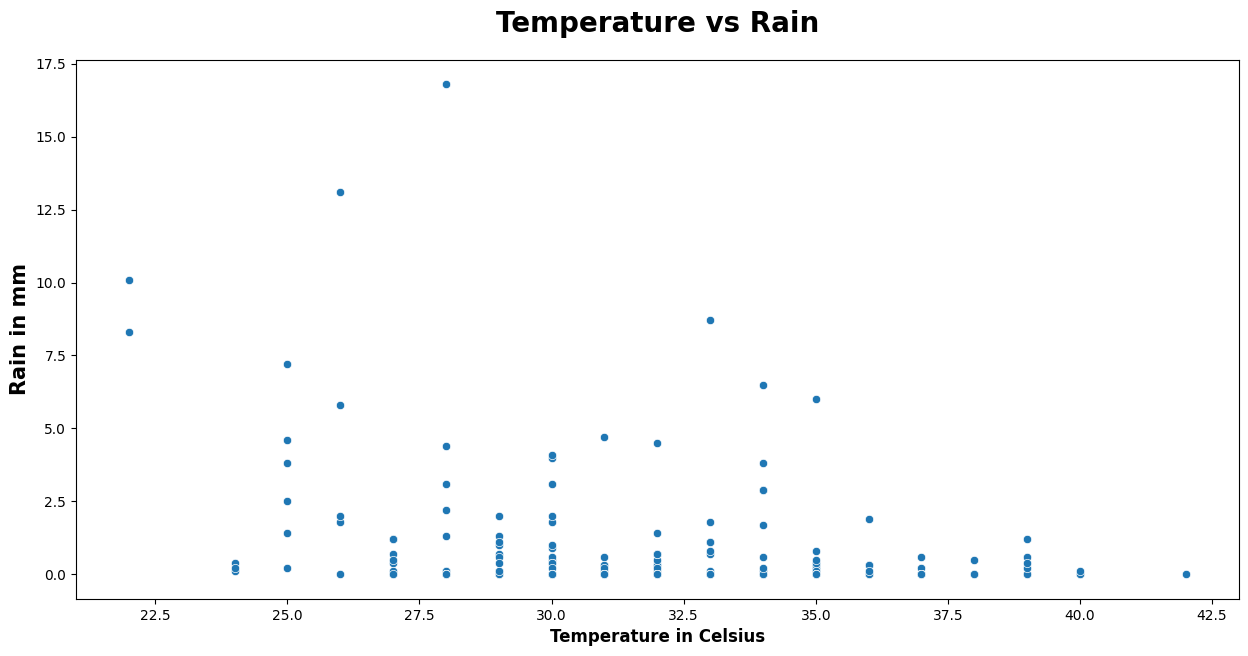

In [72]:
plt.subplots(figsize=(15,7))
sns.scatterplot(x='Temperature', y='Rain', data=df)
plt.title("Temperature vs Rain", weight="bold",fontsize=20, pad=20)
plt.ylabel("Rain in mm", weight="bold", fontsize=15)
plt.xlabel("Temperature in Celsius", weight="bold", fontsize=12)
plt.show()

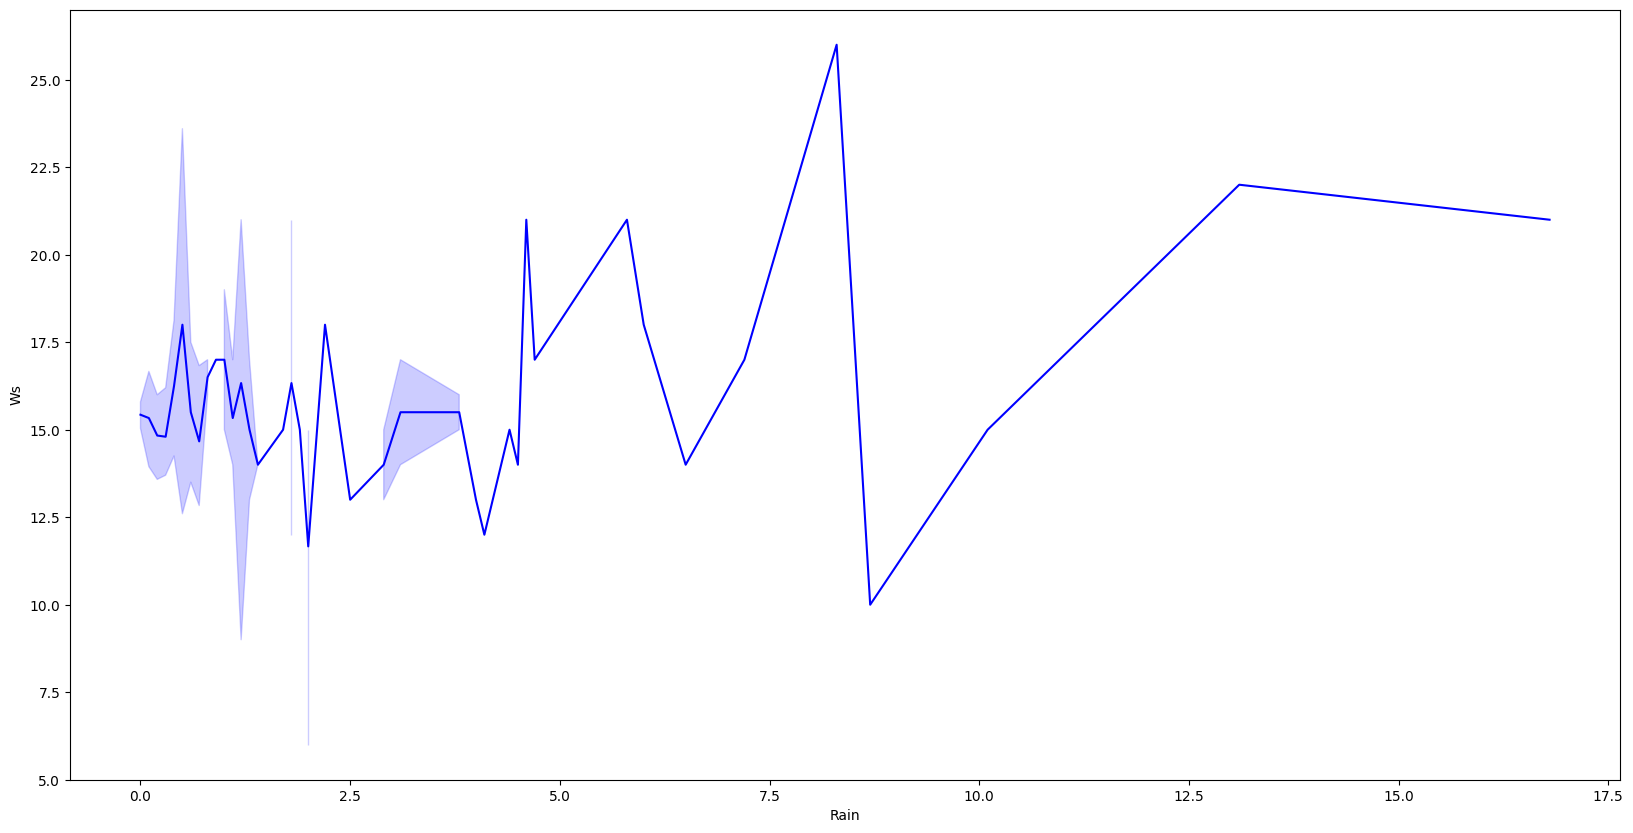

In [55]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='Rain',y='Ws',data=df,color='b')
plt.show()

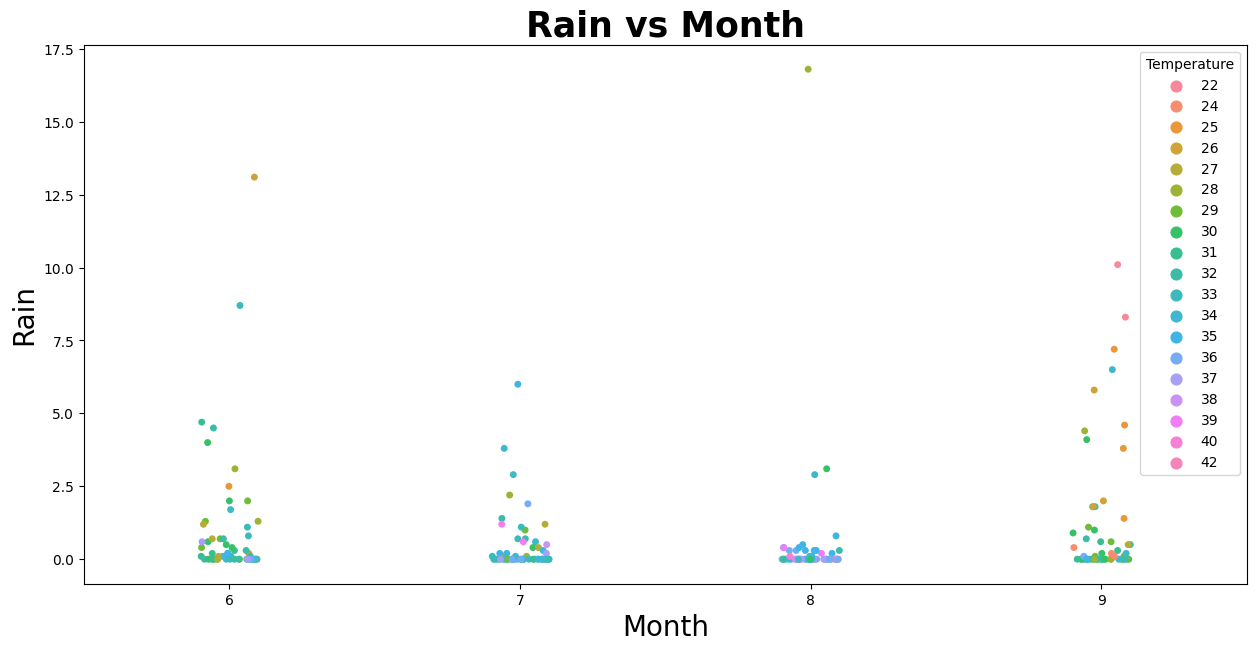

In [56]:
plt.subplots(figsize=(15,7))
plt.title('Rain vs Month',fontsize=25,weight='bold')
sns.stripplot(y='Rain',x='month',data=df,hue='Temperature')
plt.xlabel('Month',fontsize=20)
plt.ylabel('Rain',fontsize=20)
plt.show()

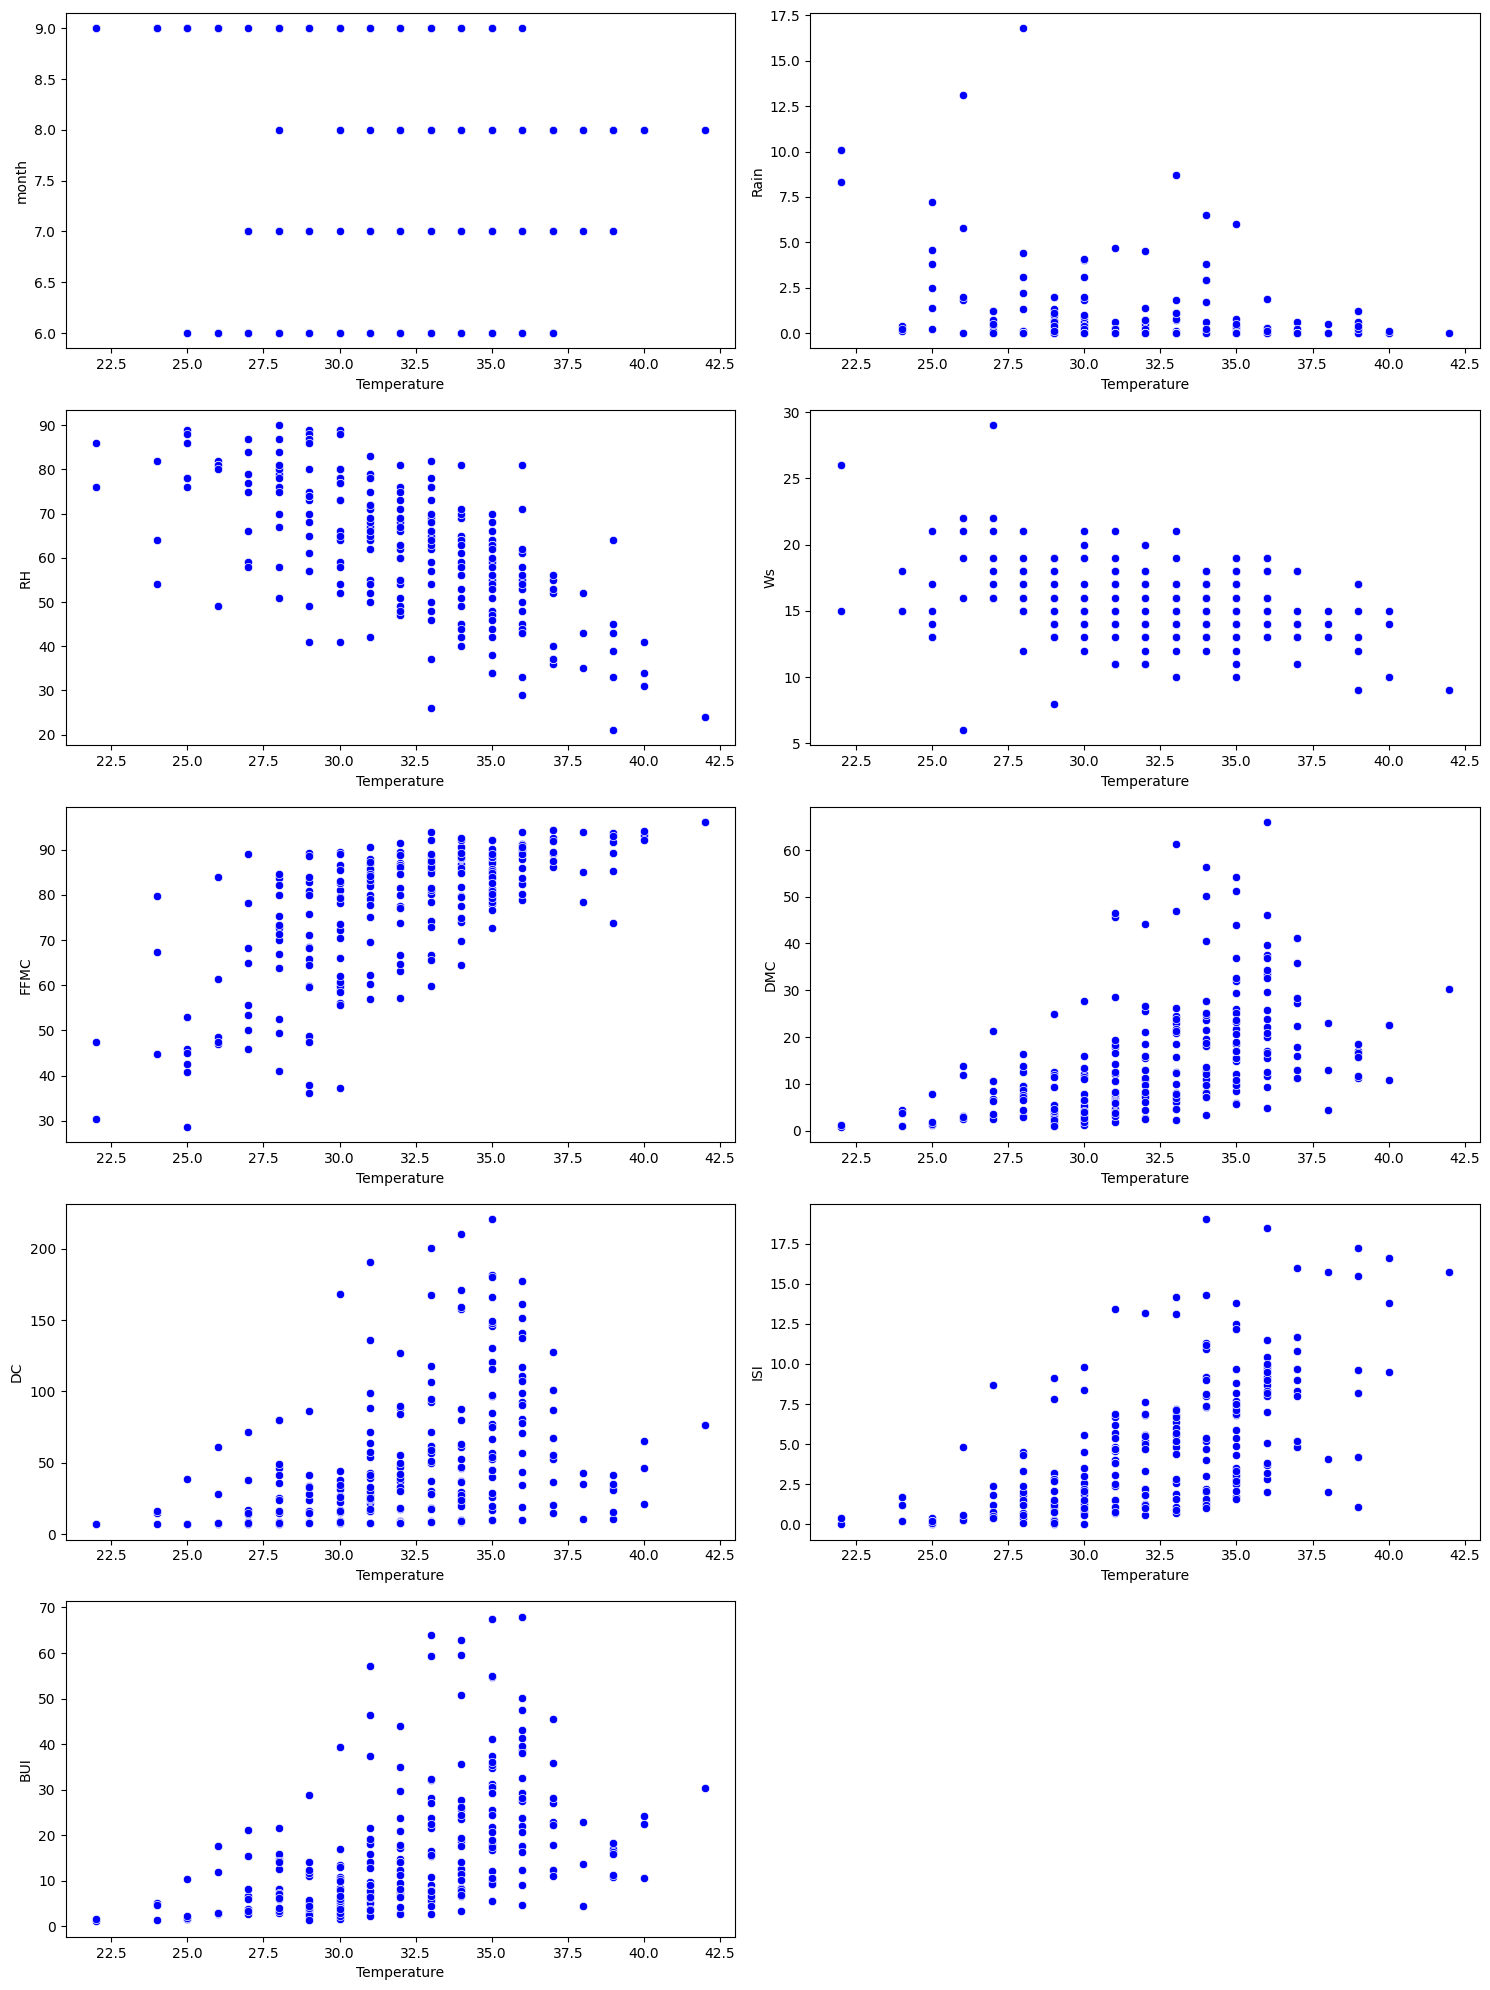

In [57]:
lst2 = ['month','Rain','RH','Ws','FFMC','DMC','DC','ISI','BUI','FWI']
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(lst1)):
    ax = plt.subplot(5, 2, i+1)
    sns.scatterplot(data= df ,x='Temperature', y=lst2[i], color='b')
    plt.tight_layout()

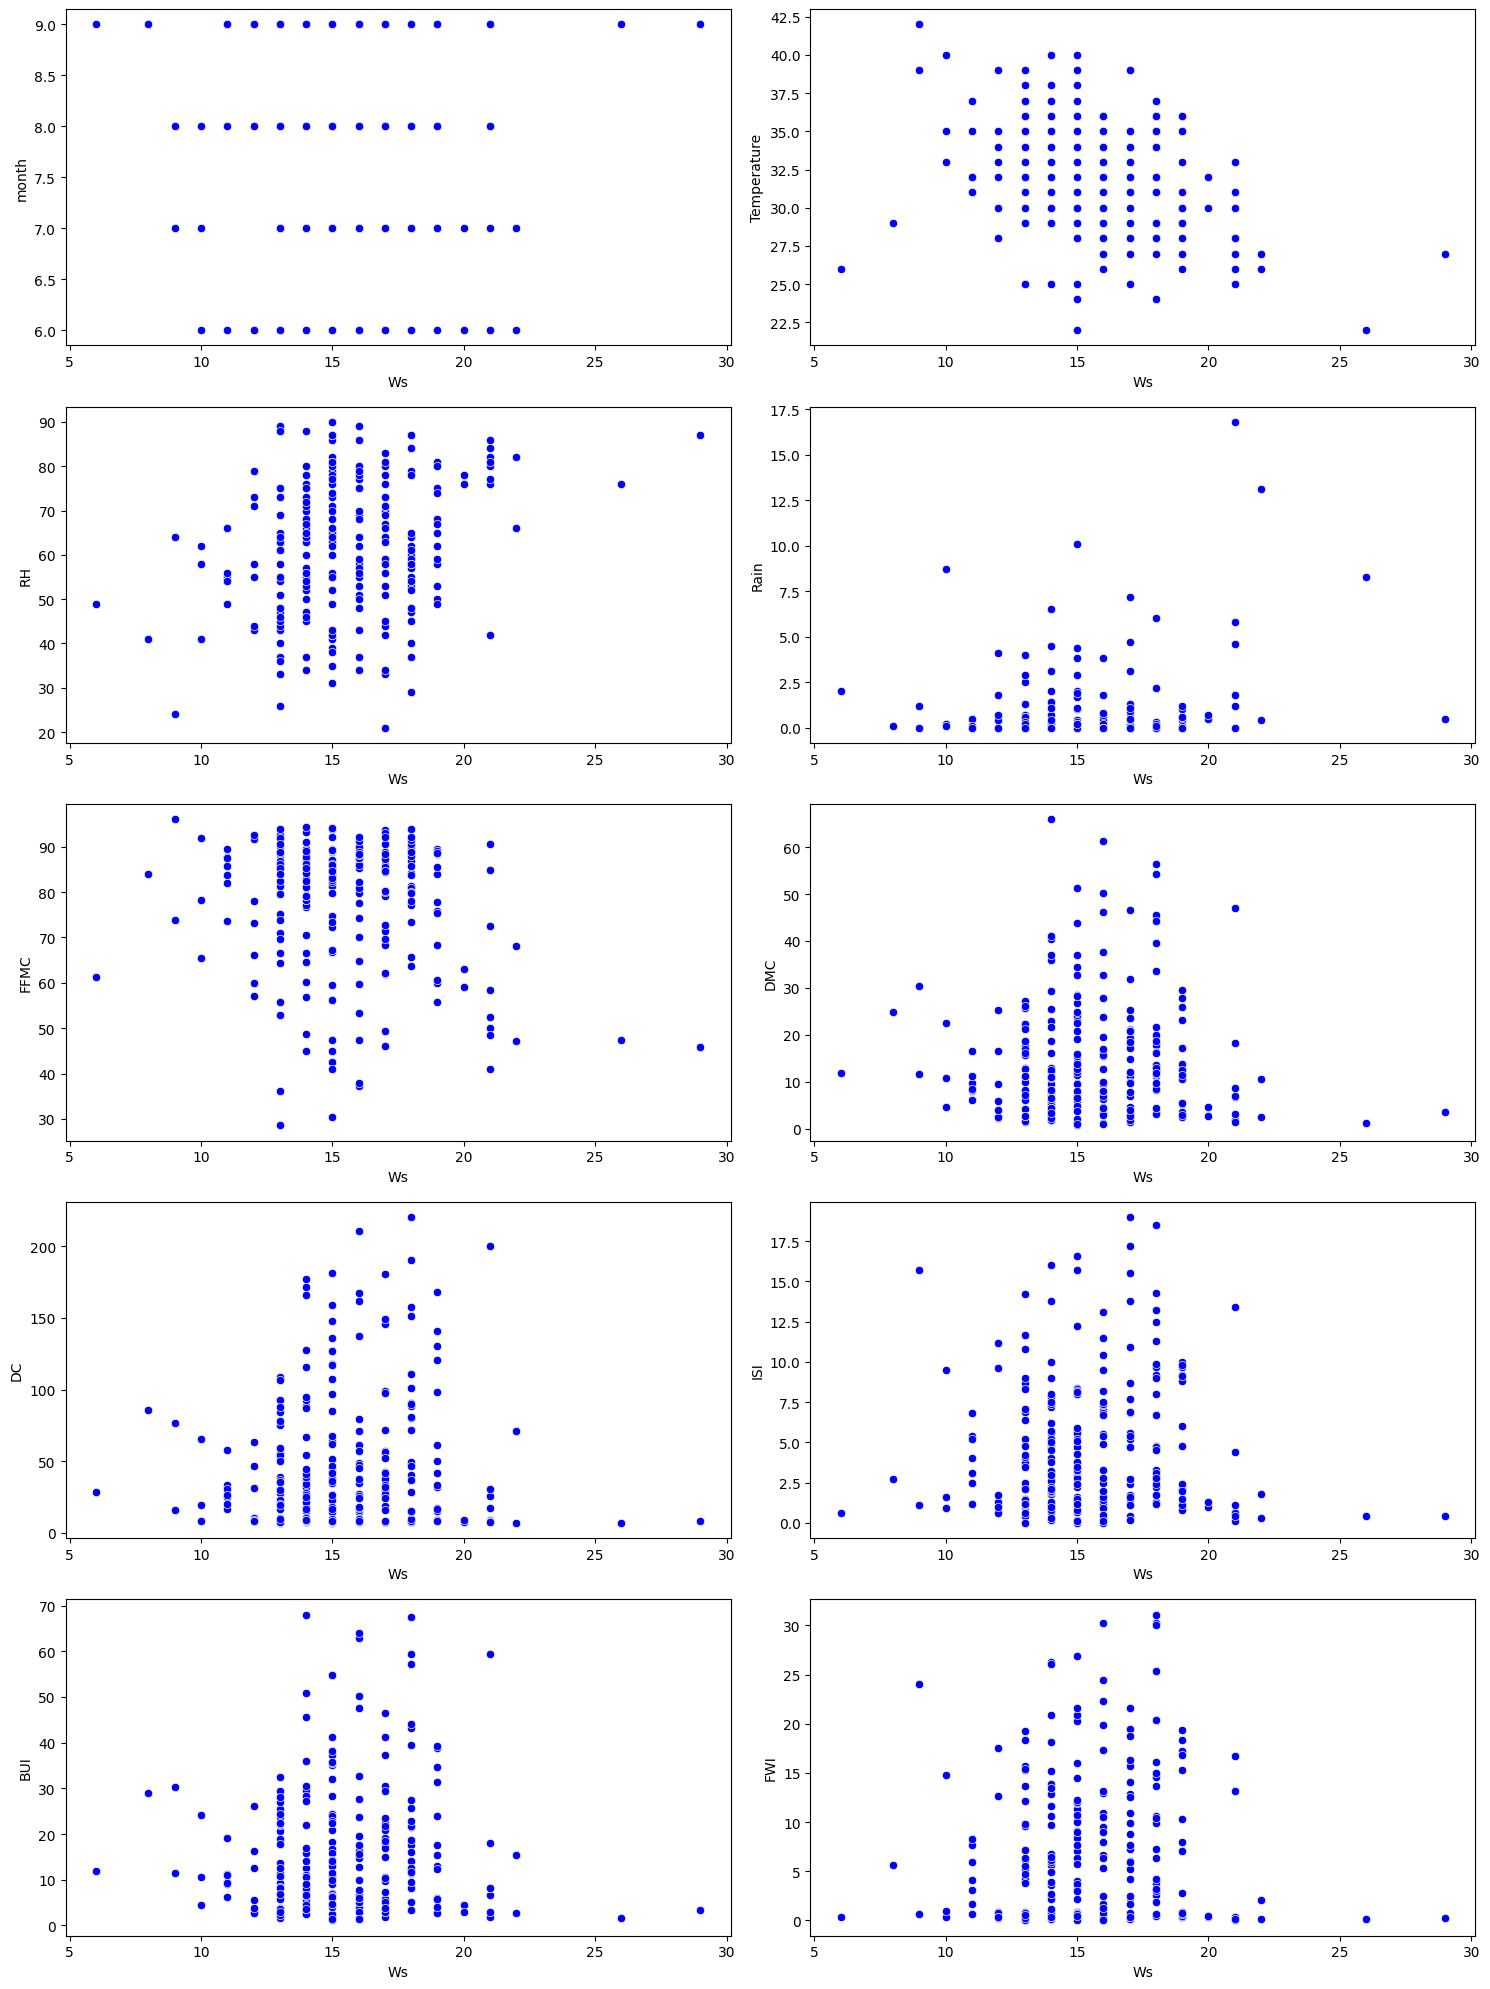

In [74]:
lst1 = ['month','Temperature','RH','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(lst1)):
    ax = plt.subplot(5, 2, i+1)
    sns.scatterplot(data= df ,x='Ws', y=lst1[i], color='b')
    plt.tight_layout()

In [75]:
df.groupby(['FFMC'])['ISI'].max()

FFMC
28.6     0.0
30.5     0.0
36.1     0.0
37.3     0.0
37.9     0.1
        ... 
93.8    15.7
93.9    18.5
94.2    16.6
94.3    16.0
96.0    15.7
Name: ISI, Length: 173, dtype: float64

**Observation**
* ISI index is 18.5 at 93.9 FFMC.

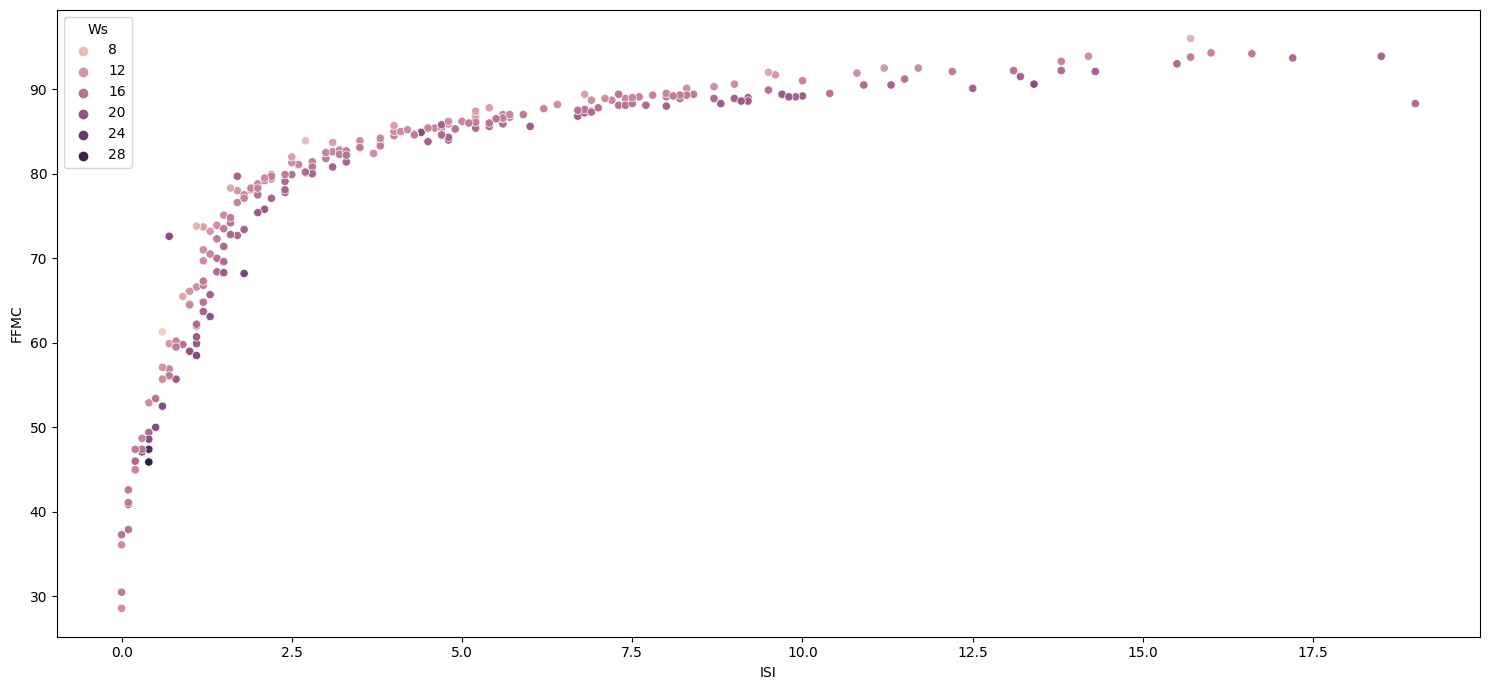

In [63]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="ISI", y="FFMC",hue='Ws')
plt.tight_layout()

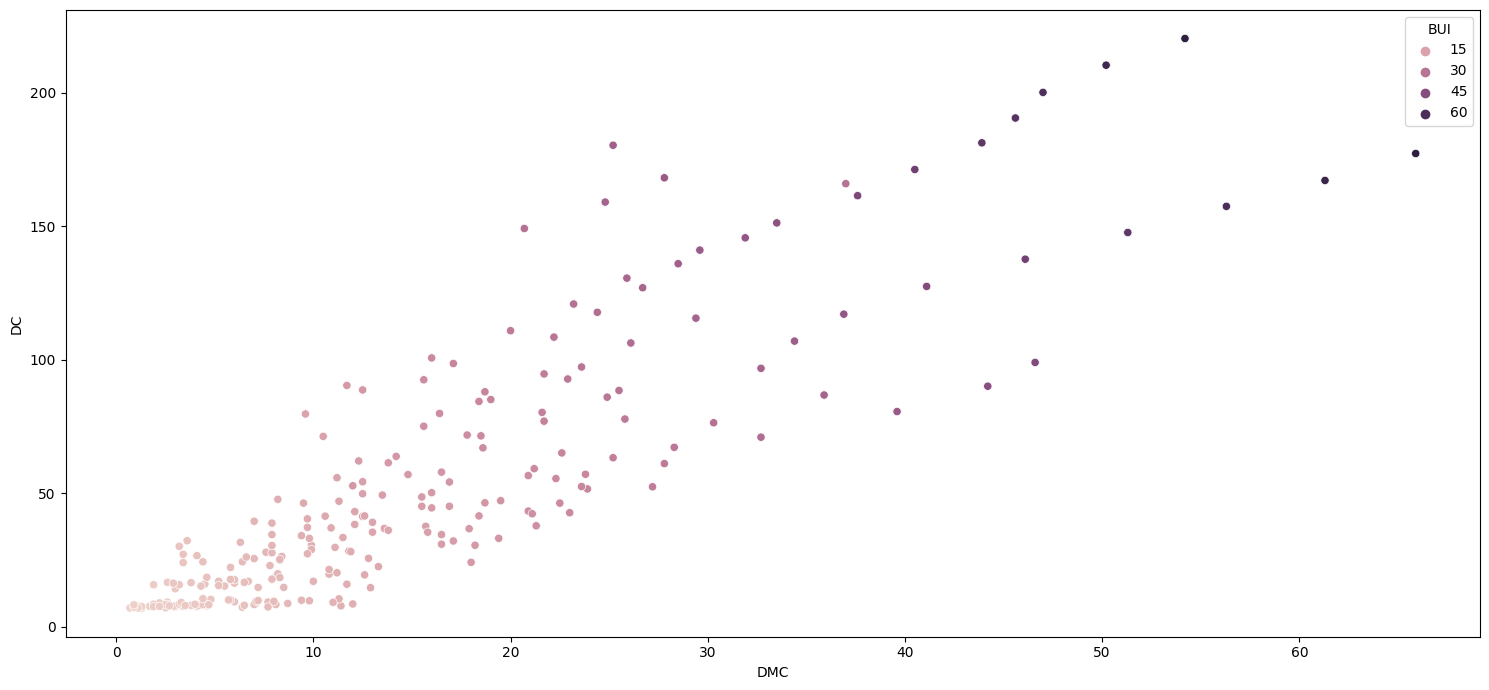

In [64]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(data=df, y="DC", x="DMC",hue='BUI')
plt.tight_layout()

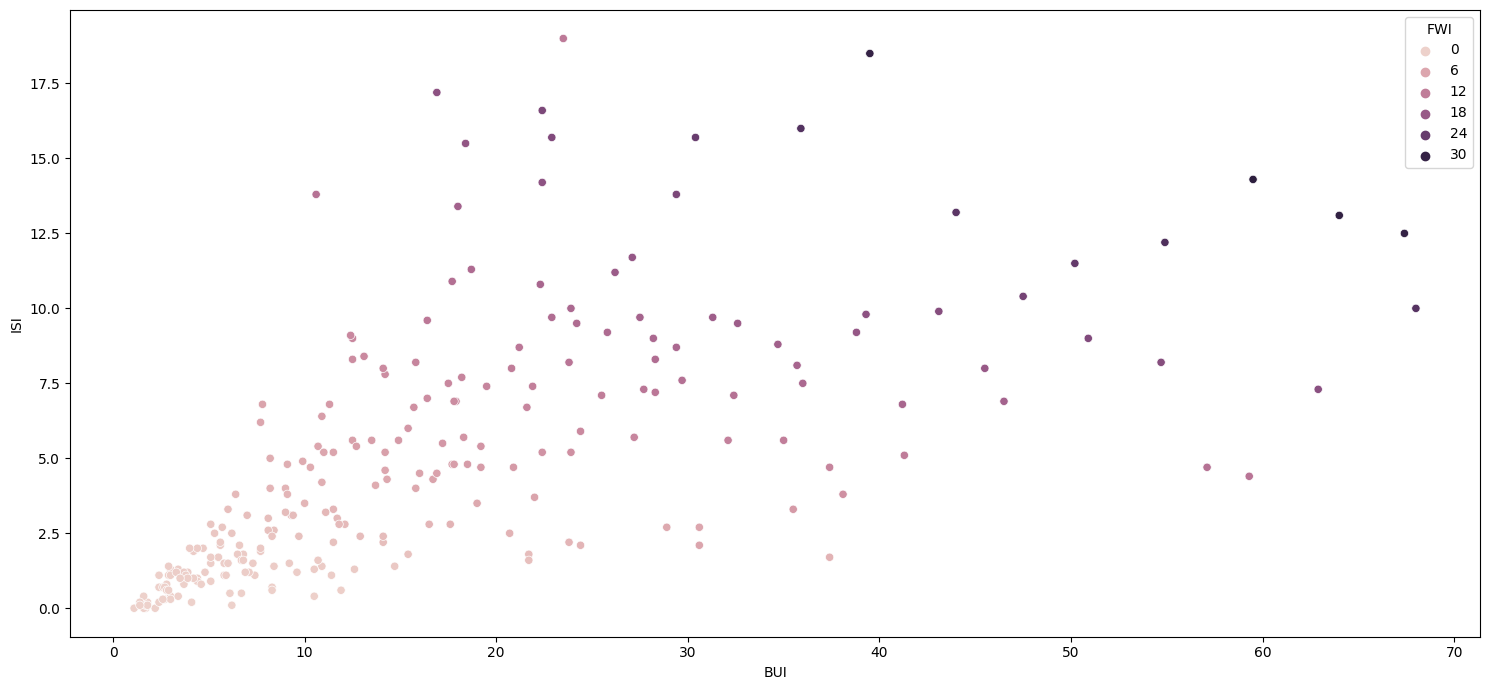

In [65]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(data=df, y="ISI", x="BUI",hue='FWI')
plt.tight_layout()